In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_consumo = pd.read_csv(r'data\consumo_energia_eletrica.csv')

In [3]:
df_consumo.head()

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo
0,2004,1,TO,Total,NaN,65876
1,2004,1,BA,Total,NaN,1444451
2,2004,1,PR,Total,NaN,1596274
3,2004,1,RS,Total,NaN,1780912
4,2004,1,GO,Total,NaN,630624


In [4]:
df_estado = pd.read_csv(r'data\estado_regiao.csv', encoding='latin1',sep=';')

In [5]:
df_estado.head()

,id_estado,sigla,estado,regiao,pais
0,1,AC,Acre,Norte,Brasil
1,2,AL,Alagoas,Nordeste,Brasil
2,3,AP,Amapá,Norte,Brasil
3,4,AM,Amazonas,Norte,Brasil
4,5,BA,Bahia,Nordeste,Brasil


In [6]:
df_consumo_estado = pd.merge(df_consumo, df_estado, left_on='sigla_uf', right_on='sigla', how='inner')


In [7]:
df_consumo_estado.head()

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo,id_estado,sigla,estado,regiao,pais
0,2004,1,TO,Total,NaN,65876,27,TO,Tocantins,Norte,Brasil
1,2004,1,BA,Total,NaN,1444451,5,BA,Bahia,Nordeste,Brasil
2,2004,1,PR,Total,NaN,1596274,16,PR,Paraná,Sul,Brasil
3,2004,1,RS,Total,NaN,1780912,21,RS,Rio Grande do Sul,Sul,Brasil
4,2004,1,GO,Total,NaN,630624,9,GO,Goiás,Centro-Oeste,Brasil


In [8]:
df_consumo_estado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39897 entries, 0 to 39896
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ano                  39897 non-null  int64  
 1   mes                  39897 non-null  int64  
 2   sigla_uf             39897 non-null  object 
 3   tipo_consumo         39897 non-null  object 
 4   numero_consumidores  26937 non-null  float64
 5   consumo              39897 non-null  int64  
 6   id_estado            39897 non-null  int64  
 7   sigla                39897 non-null  object 
 8   estado               39897 non-null  object 
 9   regiao               39897 non-null  object 
 10  pais                 39897 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 3.3+ MB


In [9]:
df_consumo_estado.describe()

,ano,mes,numero_consumidores,consumo,id_estado
count,39897.000000,39897.000000,2.693700e+04,3.989700e+04,39897.000000
mean,2013.742161,6.505752,6.954567e+05,6.076862e+05,13.999749
std,5.886017,3.454432,1.869920e+06,1.198425e+06,7.788959
min,2004.000000,1.000000,5.200000e+01,3.540000e+02,1.000000
25%,2009.000000,4.000000,1.874100e+04,8.559200e+04,7.000000
50%,2014.000000,7.000000,1.084390e+05,2.197670e+05,14.000000
75%,2019.000000,10.000000,4.581500e+05,5.946410e+05,21.000000
max,2023.000000,12.000000,1.920126e+07,1.280974e+07,27.000000


<Axes: xlabel='consumo', ylabel='estado'>

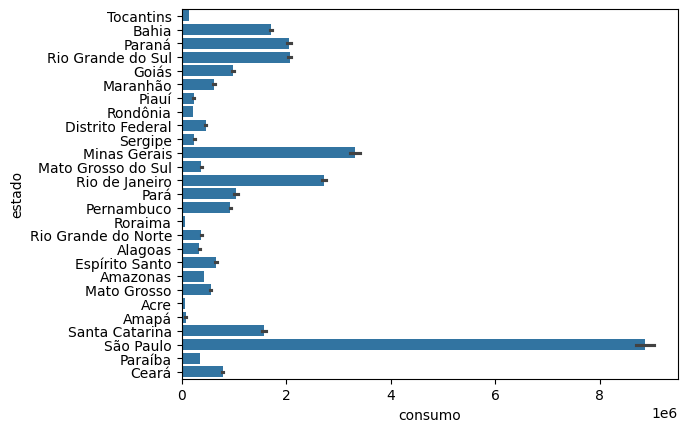

In [13]:
sns.barplot(data=df_consumo_estado[df_consumo_estado['numero_consumidores'].isna()],y='estado',x='consumo', orient='h')

C:\Users\andre\AppData\Local\Temp\ipykernel_6680\3077951085.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_consumo_estado, x='consumo', y='estado', orient='h', palette='viridis')


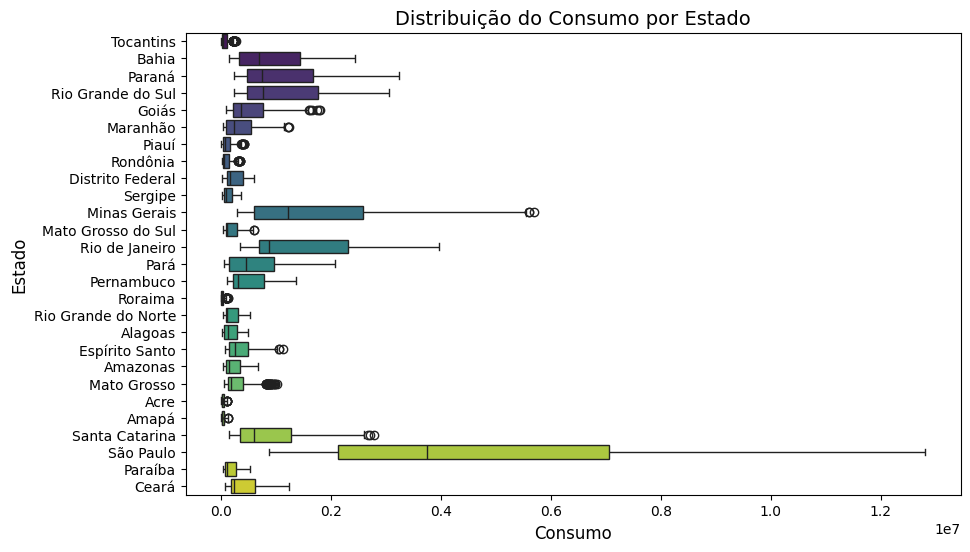

In [10]:
# Criando o boxplot horizontal
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_consumo_estado, x='consumo', y='estado', orient='h', palette='viridis')

# Personalização
plt.title('Distribuição do Consumo por Estado', fontsize=14)
plt.xlabel('Consumo', fontsize=12)
plt.ylabel('Estado', fontsize=12)

# Exibindo o gráfico
plt.show()

<Axes: xlabel='consumo', ylabel='estado'>

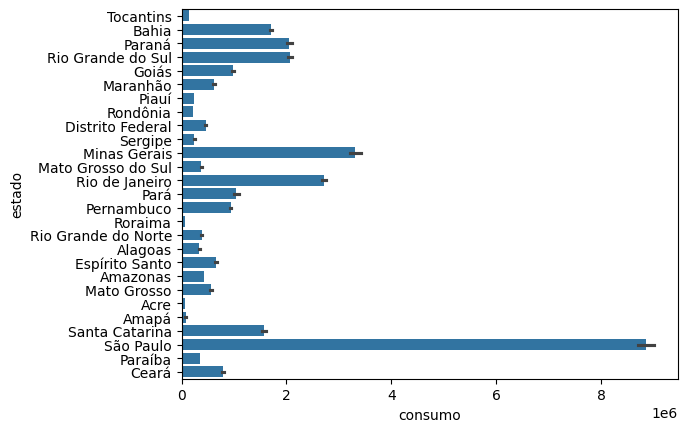

In [12]:
# Como as variáveis afetam o target?
# sns.pairplot(df_consumo_estado,palette='Dark2',hue='consumo')